In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [53]:
#df = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\resources\65262-110-values.csv')

In [54]:
#df.dropna(inplace=True)

In [55]:
#f.head()

In [56]:
#df_copy.drop("timestamp", axis=1, inplace=True)

In [57]:
#df_copy.value_counts("pgn")

In [58]:
#counts = df_copy["pgn"].value_counts()


In [59]:
#counts = df_copy.pgn.value_counts()
#counts.to_csv('name.csv')

In [60]:
#df_copy.groupby(["pgn", "spn"]).spn.value_counts().to_csv("spn_list.csv")


In [61]:
#df_copy.groupby(["pgn", "spn"]).value_counts()

### Creating a dataset with relevant PGNs

In [62]:
#values = [61443, 61444, 61441, 65247, 65266, 61450, 65248, 65215, 65263, 65213, 64817, 65253, 64777, 65262]

In [63]:
#df_new = df[df['pgn'].isin(values)]

In [64]:
#df_new.head(10)

In [65]:
#df_new.sort_values(by='timestamp')
#df_new.drop("timestamp", axis=1, inplace=True)

In [66]:
#df_new.to_csv('relevant_data.csv')

In [67]:
#df_new.shape[0]             #reduced data

In [68]:
#del df_new
#del df_copy

In [69]:
#df_new['pgn' == 61441].isin({'decodedValue' : 0.0}).value_counts()
#((df_new['pgn'] == 61441) & (df_new['decodedValue'] == 0.0)).value_counts()

In [70]:
df = pd.read_csv('relevant_data.csv')

In [71]:
#df.groupby(['pgn', 'spn']).size().to_csv('spns.csv')

In [72]:
#df['pgn'].isin([34560, 61677, 64914]).value_counts()

In [73]:
#df = df.loc[(df['pgn'] != 34560) & (df['pgn'] != 61677) & (df['pgn'] != 64914)]

In [74]:
#df['pgn'].isin([34560, 61677, 64914]).value_counts()

In [75]:
df["sensor"] = df['pgn'].astype(str) +"-"+ df["spn"].astype(str)

In [76]:
cdf = df.copy()

In [77]:
df.head(10)

,Unnamed: 0,pgn,spn,decodedValue,sensor
0,11,61444,512,45.0,61444-512
1,12,61444,2432,43.0,61444-2432
2,13,61444,513,42.0,61444-513
3,14,61444,899,7.0,61444-899
4,15,61444,4154,1.0,61444-4154
5,16,61444,1483,3.0,61444-1483
6,17,61444,1675,0.0,61444-1675
7,18,61444,190,1316.5,61444-190
8,19,65247,514,9.0,65247-514
9,20,65247,2978,0.0,65247-2978


In [78]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [79]:
df.head(10)

,pgn,spn,decodedValue,sensor
0,61444,512,45.0,61444-512
1,61444,2432,43.0,61444-2432
2,61444,513,42.0,61444-513
3,61444,899,7.0,61444-899
4,61444,4154,1.0,61444-4154
5,61444,1483,3.0,61444-1483
6,61444,1675,0.0,61444-1675
7,61444,190,1316.5,61444-190
8,65247,514,9.0,65247-514
9,65247,2978,0.0,65247-2978


In [80]:
df['sensor'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 36755315 entries, 0 to 36755314
Series name: sensor
Non-Null Count     Dtype 
--------------     ----- 
36755315 non-null  object
dtypes: object(1)
memory usage: 280.4+ MB


In [107]:
#print(df.loc[(df['sensor'] == '65262-110'), 'decodedValue'].describe())

count    22272.000000
mean        86.605289
std          5.996231
min        -40.000000
25%         86.000000
50%         88.000000
75%         90.000000
max         94.000000
Name: decodedValue, dtype: float64


Looking at only the engine cooling system

In [83]:
#sensors = ['61441-521', '61441-973', '61443-91', '61443-92', '61443-974', '61443-29', '61443-3357', '61443-5398', '61444-4154', '61444-512', '61444-513', '61444-190', '61444-2432', '61450-2659', '61450-132', '61450-5257', '64817-1550', '64817-1598', '65213-975', '65213-1639', '65247-514', '65247-515', '65247-2978', '65262-110', '65262-174', '65262-175', '65262-176', '65262-52', '65263-94', '65263-22', '65263-98', '65263-100', '65263-101', '65263-109', '65263-111', '65266-183', '65266-184', '65266-185', '65266-51', '65266-3673']
coolsys = ['64817-1598', '65262-110', '65263-111']

Creating a sub dataframe using only the cooling system

In [84]:
df = df[df['sensor'].isin(coolsys)]

In [85]:
df.shape

(92562, 4)

In [86]:
#new_df = pd.DataFrame(columns = sensors)

In [87]:
#new_df

In [88]:
lsofdicts = []
for index,rows in df.iterrows():
    x = rows[3]
    y = rows[2]
    z = {x: y}
    lsofdicts.append(z)
this_df = pd.DataFrame(lsofdicts)

In [89]:
#pd.concat([new_df, z], ignore_index=True)

In [90]:
this_df.head(20)

,65262-110,65263-111,64817-1598
0,90.0,NaN,NaN
1,NaN,50.0,NaN
2,NaN,50.0,NaN
3,NaN,NaN,4096.0
4,NaN,50.0,NaN
5,90.0,NaN,NaN
6,NaN,NaN,4096.0
7,NaN,0.0,NaN
8,NaN,50.0,NaN
9,90.0,NaN,NaN


In [91]:
#pd.concat([new_df, this_df], ignore_index=True)

In [92]:
#this_df.fillna(this_df.mean(), inplace=True)

In [93]:
this_df.fillna(method='ffill', inplace=True)
this_df.dropna(inplace=True)
this_df.head(10)

,65262-110,65263-111,64817-1598
3,90.0,50.0,4096.0
4,90.0,50.0,4096.0
5,90.0,50.0,4096.0
6,90.0,50.0,4096.0
7,90.0,0.0,4096.0
8,90.0,50.0,4096.0
9,90.0,50.0,4096.0
10,90.0,50.0,4096.0
11,90.0,50.0,4096.0
12,90.0,50.0,4096.0


<Axes: >

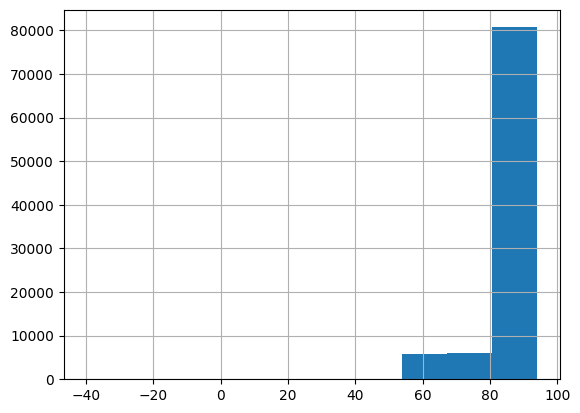

In [94]:
this_df['65262-110'].hist()

In [95]:
this_df['64817-1598'].value_counts()

64817-1598
4096.0    92509
0.0          50
Name: count, dtype: int64

<Axes: >

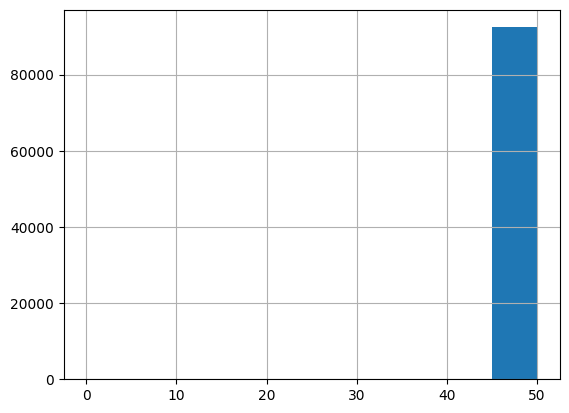

In [96]:
this_df['65263-111'].hist()

In [97]:
#this_df['65263-101'].hist()

In [98]:
#sample1 = this_df['61441-521'].dropna()
#sample2 = this_df['61441-973'].dropna()
#sample3 = this_df['65215-904'].dropna()

In [99]:
this_df.shape

(92559, 3)

In [100]:
this_df.to_csv('cooling_system.csv')